In [41]:
# importing necessary dependancies
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import import_ipynb
from models import LSTM, LSTMNet, CustomUnit, CustomNet
from helpers import train_and_validate, count_parameters, plot_loss_comparison, plot_test_predictions, compare_mse_loss
import time

In [42]:
# use NVIDIA Geforce GTX 1650
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [43]:
# hyperparameters
batch_size = 32
input_size = 2
hidden_size = 128
num_classes = 1
learning_rate = 0.001
epochs = 100

In [44]:
# function to create the adding problem dataset
def adding_problem_generator(N, seq_len=8, high=1):
    """ A data generator for adding problem.

    A single entry has a 2D vector with two rows of the same length. 
    The first row has random numbers, and the second row contains a 
    binary mask with ones at only two positions. The label for this 
    entry is the sum of the numbers from the first row where the mask 
    is one.

     input          label
     -----          -----
    1 4 5 3  ----->   9 (4 + 5)
    0 1 1 0

    N: the number of the entries.
    eq_len: the length of a single sequence.
    p: the probability of 1 in generated mask
    high: the random data is sampled from a [0, high] uniform distribution.
    return: (X, Y), X the data, Y the label.
    """
    X_num = np.random.uniform(low=0, high=high, size=(N, seq_len, 1))
    X_mask = np.zeros((N, seq_len, 1))
    Y = np.ones((N, 1))
    for i in range(N):
        # Default uniform distribution on position sampling
        positions = np.random.choice(seq_len, size=2, replace=False)
        X_mask[i, positions] = 1
        Y[i, 0] = np.sum(X_num[i, positions])
    X = np.append(X_num, X_mask, axis=2)
    return X, Y

In [45]:
# creating the train and test datasets
X_train, Y_train = adding_problem_generator(1000, 10, 1)
X_val, Y_val = adding_problem_generator(100, 10, 1)
X_test, Y_test = adding_problem_generator(100, 10, 1)
X_train = torch.tensor(X_train).float()
Y_train = torch.tensor(Y_train).float()
X_val = torch.tensor(X_test).float()
Y_val = torch.tensor(Y_test).float()
X_test = torch.tensor(X_test).float()
Y_test = torch.tensor(Y_test).float()

In [46]:
print(X_test.shape)

torch.Size([100, 10, 2])


In [47]:
class AddingProblemDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        
    def __len__(self):
        return len(self.X)
        
    def __getitem__(self, i):
        return self.X[i], self.Y[i]

train_dataset = AddingProblemDataset(X_train, Y_train)
val_dataset = AddingProblemDataset(X_val, Y_val)

In [48]:
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = batch_size, shuffle = False)

In [49]:
lstmnet = LSTMNet(2, 32, 1).to(device)
customnet= CustomNet(2, 32, 1).to(device)

In [50]:
total_lstmnet_parameters = count_parameters(lstmnet)
total_customnet_parameters = count_parameters(customnet)

In [51]:
criterion = nn.MSELoss()
lstmnet_optimizer = torch.optim.SGD(lstmnet.parameters(), lr = learning_rate)
customnet_optimizer = torch.optim.SGD(customnet.parameters(), lr = learning_rate)

In [52]:
lstmnet_train_loss_array = []
lstmnet_val_loss_array = []
customnet_train_loss_array = []
customnet_val_loss_array = []

In [53]:
lstmnet_start_time = time.time()
train_and_validate(epochs, lstmnet, train_loader, val_loader, criterion, lstmnet_optimizer, lstmnet_train_loss_array, lstmnet_val_loss_array)
lstmnet_end_time = time.time()
lstmnet_total_training_time = lstmnet_end_time - lstmnet_start_time
lstmnet_avg_training_time_per_epoch = lstmnet_total_training_time / epochs

Epoch no.: 1 | Training Loss: 1.2303988579660654 | Validation Loss: 1.1134744882583618
Epoch no.: 2 | Training Loss: 1.1005891021341085 | Validation Loss: 0.9910121560096741
Epoch no.: 3 | Training Loss: 0.9698999263346195 | Validation Loss: 0.8849152326583862
Epoch no.: 4 | Training Loss: 0.8746790532022715 | Validation Loss: 0.7919740080833435
Epoch no.: 5 | Training Loss: 0.7844385337084532 | Validation Loss: 0.7109340876340866
Epoch no.: 6 | Training Loss: 0.7071673329919577 | Validation Loss: 0.6405702531337738
Epoch no.: 7 | Training Loss: 0.6378311719745398 | Validation Loss: 0.5788026601076126
Epoch no.: 8 | Training Loss: 0.5774707309901714 | Validation Loss: 0.52503951638937
Epoch no.: 9 | Training Loss: 0.5232512289658189 | Validation Loss: 0.4783892333507538
Epoch no.: 10 | Training Loss: 0.4797477852553129 | Validation Loss: 0.4376426339149475
Epoch no.: 11 | Training Loss: 0.44219971634447575 | Validation Loss: 0.40211784839630127
Epoch no.: 12 | Training Loss: 0.41041596

In [54]:
customnet_start_time = time.time()
train_and_validate(epochs, customnet, train_loader, val_loader, criterion, customnet_optimizer, customnet_train_loss_array, customnet_val_loss_array)
customnet_end_time = time.time()
customnet_total_training_time = customnet_end_time - customnet_start_time
customnet_avg_training_time_per_epoch = customnet_total_training_time / epochs

Epoch no.: 1 | Training Loss: 1.266798174008727 | Validation Loss: 1.1447252333164215
Epoch no.: 2 | Training Loss: 1.117878571152687 | Validation Loss: 1.017529085278511
Epoch no.: 3 | Training Loss: 0.9989262968301773 | Validation Loss: 0.9065490663051605
Epoch no.: 4 | Training Loss: 0.8887074906378984 | Validation Loss: 0.8100675344467163
Epoch no.: 5 | Training Loss: 0.8084401674568653 | Validation Loss: 0.7255671471357346
Epoch no.: 6 | Training Loss: 0.72650364972651 | Validation Loss: 0.651989609003067
Epoch no.: 7 | Training Loss: 0.6461708378046751 | Validation Loss: 0.5882828533649445
Epoch no.: 8 | Training Loss: 0.5951861562207341 | Validation Loss: 0.5321008637547493
Epoch no.: 9 | Training Loss: 0.5305569907650352 | Validation Loss: 0.4837927222251892
Epoch no.: 10 | Training Loss: 0.485878205858171 | Validation Loss: 0.4417877048254013
Epoch no.: 11 | Training Loss: 0.4496612520888448 | Validation Loss: 0.40491198748350143
Epoch no.: 12 | Training Loss: 0.41712359478697

In [55]:
lstmnet_predictions = lstmnet(X_test.to(device)).cpu().detach().numpy()
customnet_predictions = customnet(X_test.to(device)).cpu().detach().numpy()

In [56]:
# FINAL REPORT PRINT
print()
print()
print("------------------------------------------------------------")
print(f"Total Parameters:     LSTMNet: {total_lstmnet_parameters}  |  CustomNet: {total_customnet_parameters}")
print()
print(f"Total Training Time:     LSTMNet: {lstmnet_total_training_time}  |  CustomNet: {customnet_total_training_time}")
print()
print(f"Average Training Time Per Epoch:     LSTMNet: {lstmnet_avg_training_time_per_epoch}  |  CustomNet: {customnet_avg_training_time_per_epoch}")

print("------------------------------------------------------------")



------------------------------------------------------------
Total Parameters:     LSTMNet: 4513  |  CustomNet: 2177

Total Training Time:     LSTMNet: 53.71896958351135  |  CustomNet: 30.13940191268921

Average Training Time Per Epoch:     LSTMNet: 0.5371896958351136  |  CustomNet: 0.30139401912689207
------------------------------------------------------------


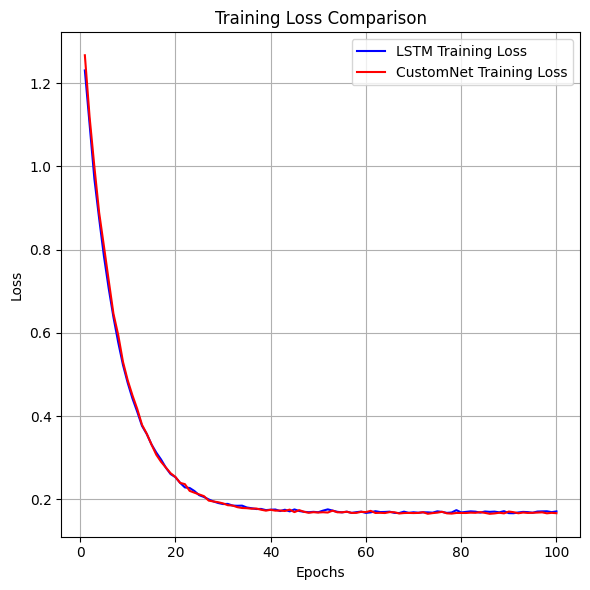

In [57]:
plot_loss_comparison(epochs, lstmnet_train_loss_array, customnet_train_loss_array, "LSTM Training Loss", "CustomNet Training Loss", "Training Loss Comparison")

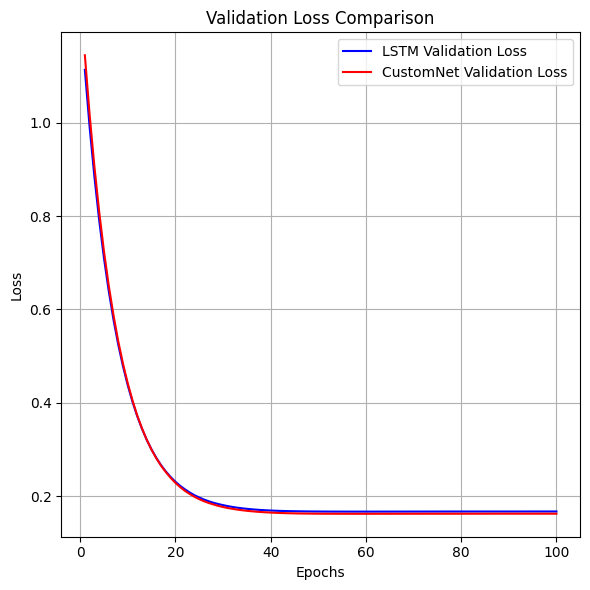

In [58]:
plot_loss_comparison(epochs, lstmnet_val_loss_array, customnet_val_loss_array, "LSTM Validation Loss", "CustomNet Validation Loss", "Validation Loss Comparison")

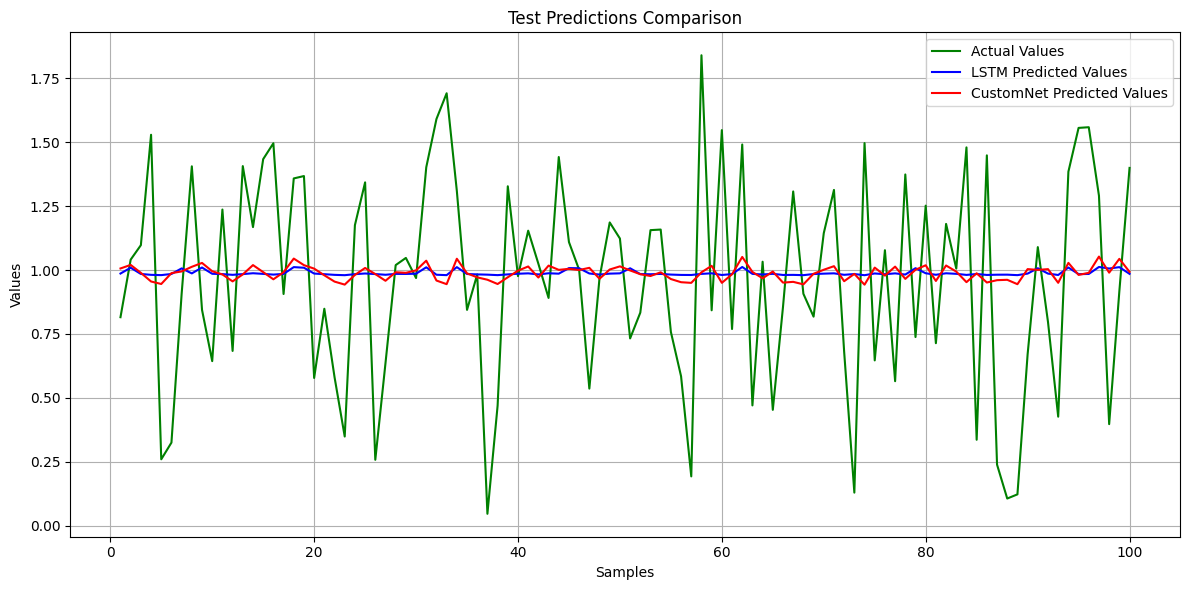

In [59]:
plot_test_predictions(Y_test, lstmnet_predictions, customnet_predictions)

In [60]:
compare_mse_loss(Y_test, lstmnet_predictions, customnet_predictions)

LSTM MSE Loss: 0.1697060614824295
Custom Network MSE Loss: 0.16633069515228271
